## 📌 Project Overview

This project analyzes a real credit card transactions dataset to identify patterns related to fraudulent activity.


We begin by exploring the structure of the data and visualizing key distributions to understand how the transactions are spread across different features.

The goal of this initial analysis is to detect any data imbalance, unusual patterns, or relationships that may affect the modeling stage later.

This step-by-step exploration helps build a clear understanding of the dataset before applying any preprocessing or machine learning techniques.

## 1. Business Problem & Goal

Credit card fraud detection is a high-stakes classification problem where the objective is to identify fraudulent transactions as early and as accurately as possible.

In this context, different types of errors have different costs:

- False Negative: the transaction is fraudulent but the model predicts it as legitimate, leading to direct financial loss and potential chargebacks.
- False Positive: the transaction is legitimate but the model flags it as fraudulent, causing customer friction and potentially leading to customer churn.

Because missing fraudulent transactions is typically more costly than incorrectly flagging legitimate ones, this project prioritizes Recall to capture as many fraud cases as possible, while monitoring Precision to keep false alarms at an acceptable level.

The final deliverable is a model that outputs fraud probabilities for each transaction, allowing the decision threshold to be adjusted based on the trade-off between minimizing financial loss and maintaining a good customer experience, in line with business tolerance for risk.


Note: Accuracy alone is not sufficient for this problem due to class imbalance between fraudulent and legitimate transactions. Therefore, evaluation will focus on metrics such as Precision, Recall, F1-score, and ROC-AUC / PR-AUC.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install imbalanced-learn

In [13]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [14]:
df=pd.read_csv(path+"/creditcard.csv")

## 🔍 Exploratory Data Analysis (EDA)

This section provides an initial examination of the dataset to understand its main characteristics before applying any preprocessing steps.

The analysis focuses on identifying the structure of the data, detecting class imbalance, and observing general patterns across the features.

Gaining these insights early helps ensure that the following preprocessing and modeling stages are carried out with a clear understanding of the dataset’s behavior.

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
print("Shape:", df.shape)

Shape: (284807, 31)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## 📊 Class Distribution

This section examines the distribution of the target classes in the dataset.

Understanding how frequently each class appears is essential, especially when the dataset is imbalanced.

This information helps determine whether additional techniques, such as resampling, will be needed before building models.

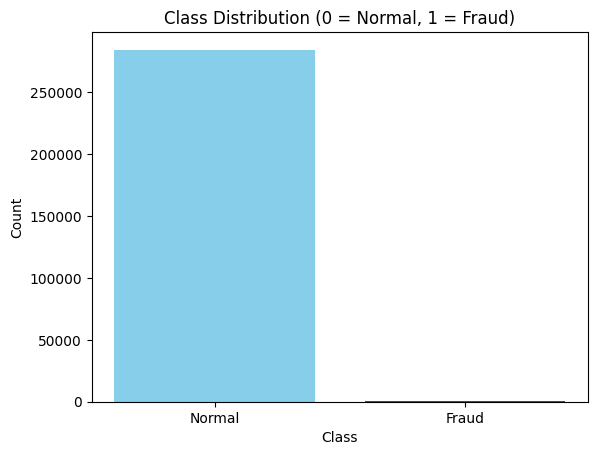

In [19]:
# Visualize how many transactions are Normal vs Fraud

class_counts = df['Class'].value_counts()
colors = ['skyblue', 'red']  # Normal = skyblue, Fraud = red

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xticks([0,1], ['Normal','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()
# Simple bar plot to show counts of each class
# This helps us see the imbalance in the dataset



## 💰 Transaction Amount Analysis

This section analyzes the distribution of transaction amounts.

Understanding how amounts are spread helps identify whether transactions are mostly small or large,
and whether any extreme values exist that could influence later steps.

Examining this feature is important before applying scaling or using it during modeling.

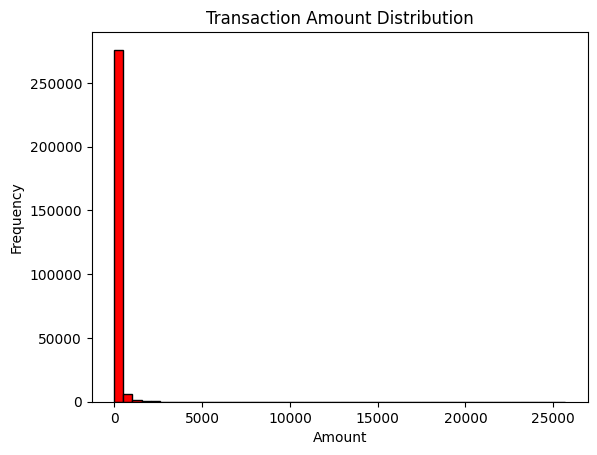

In [20]:
#Explore the distribution of transaction amounts
plt.hist(df['Amount'], bins=50, color='red', edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
# Histogram of the 'Amount' column
# Helps identify if there are very large or very small transactions,
# which could indicate potential fraud

## ⏱️ Transaction Time Analysis

This section examines the distribution of transaction times.

Analyzing how transactions are spread across time helps reveal when activity peaks and whether any unusual patterns appear.

Understanding the timing of transactions provides useful context before preparing the data for modeling.

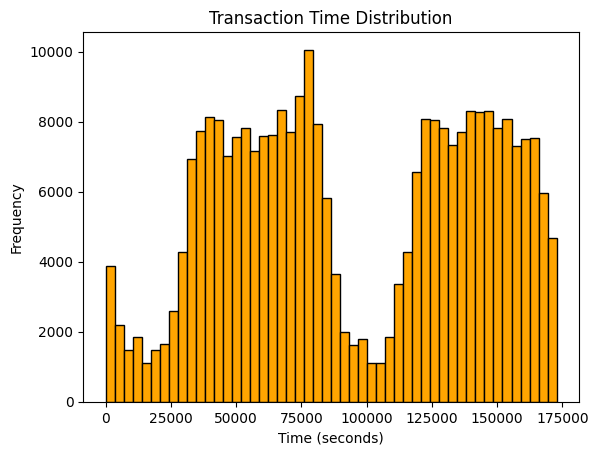

In [21]:
#Explore the distribution of transaction times
plt.hist(df['Time'], bins=50, color='orange', edgecolor='black')
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()
# Histogram of the 'Time' column
# Shows when most transactions occur throughout the day

## 🧩 Feature Correlation Analysis

*   List item
*   List item



This section visualizes the correlation between all numerical features in the dataset.

The correlation matrix helps reveal whether any features have strong relationships with each other,
which is important for detecting patterns and understanding feature behavior.

Identifying these relationships provides useful context before applying preprocessing or modeling steps.

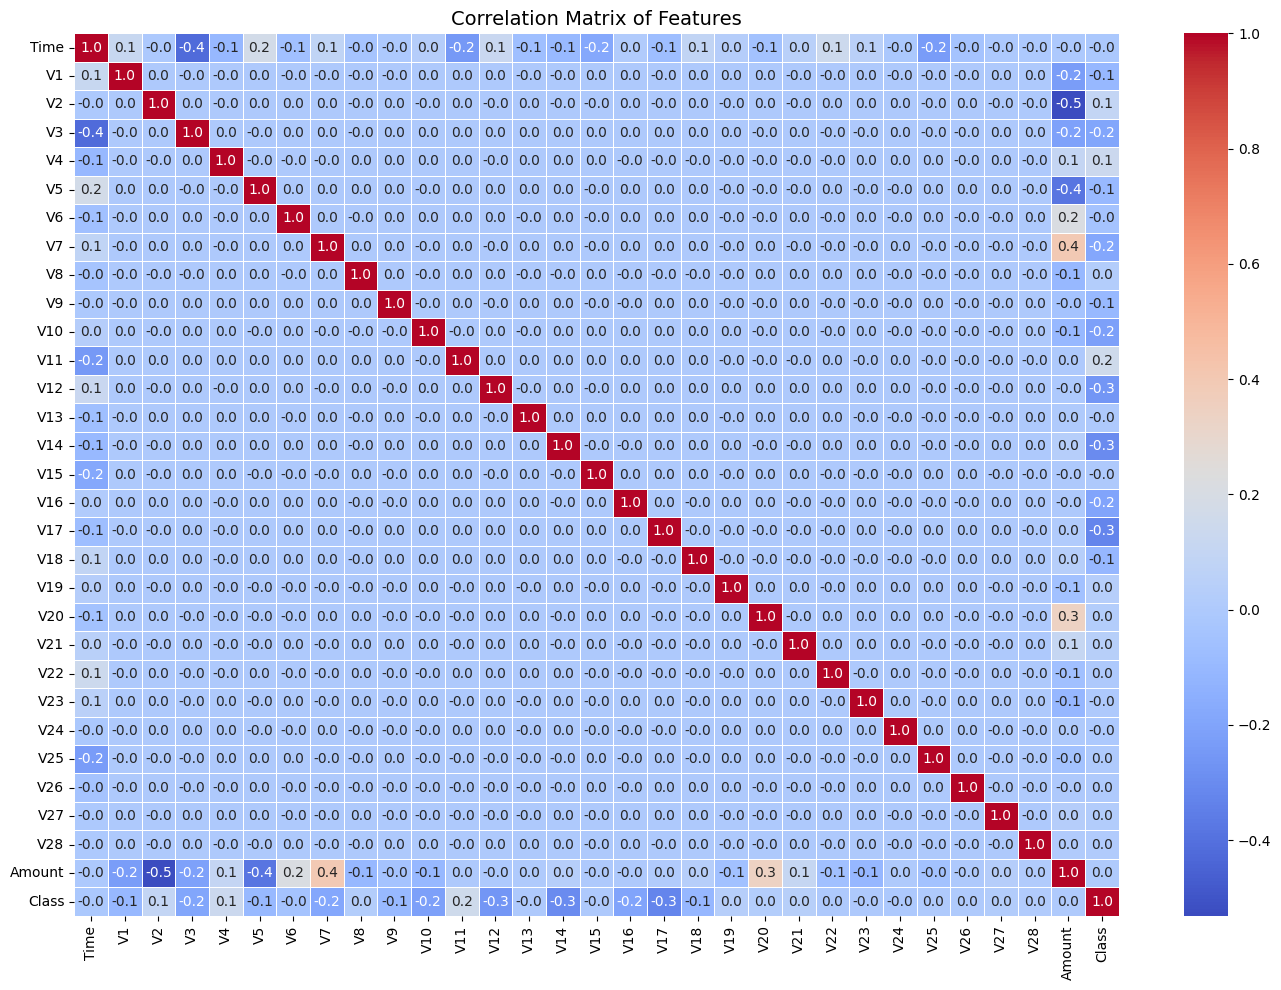

In [26]:
# Correlation matrix between all features
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Features", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Computes correlation between all numeric columns
# Helps identify which features might be related
# Useful for understanding patterns before building models


## ⚙️ Data Preprocessing

This section prepares the dataset for modeling.

The main steps include separating features from the target variable, scaling the transaction amount,  
splitting the data into training and test sets, and handling class imbalance in the training data.

These operations ensure that the models are trained on well-structured and balanced data.


In [ ]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1).copy()  # all columns except 'Class'
y = df['Class']                      # target column

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep the same class ratio in train and test
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature correctly
scaler = StandardScaler()

scaler.fit(X_train[['Amount']])

# Apply scaling to both training and test sets
X_train['Amount'] = scaler.transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


## 📈 Logistic Regression Model

This section trains a logistic regression model using the balanced training data.  

The model is then evaluated on the test set using precision, recall, F1-score,  
and the confusion matrix to assess its ability to detect fraudulent transactions.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the logistic regression model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred_log = log_model.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962


Confusion Matrix:
[[56194   670]
 [    9    89]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


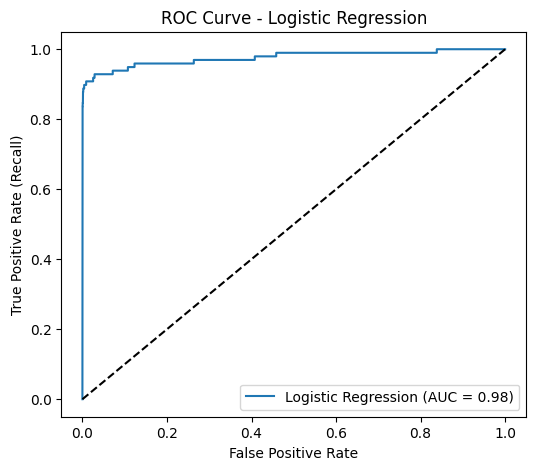

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## Random Forest Classifier  
This section trains a Random Forest model using the balanced training data.  
Random Forest is often more robust than logistic regression and can capture  
non-linear patterns in the features. The model is evaluated on the original  
test set using precision, recall, F1-score, and the confusion matrix to assess  
its effectiveness in detecting fraudulent transactions.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # helps with imbalance
)

rf_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56847    17]
 [   18    80]]


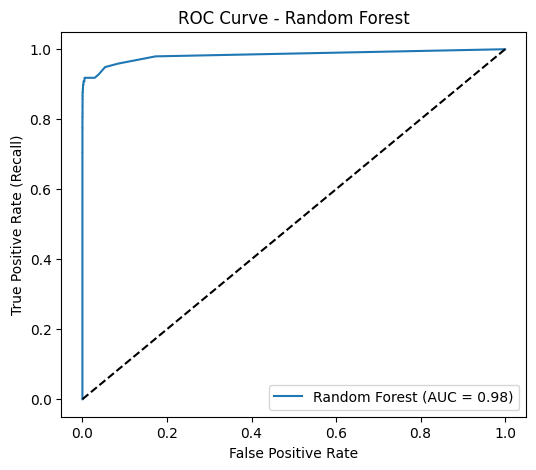

In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


##XGBoost Classifier

This section trains an XGBoost classifier, which is often one of the strongest models  
for imbalanced classification tasks such as fraud detection.  
The model is trained on the balanced training data and evaluated on the original  
test set using precision, recall, F1-score, and the confusion matrix.


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1   # because training data already balanced by SMOTE
)

xgb_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56838    26]
 [   14    84]]


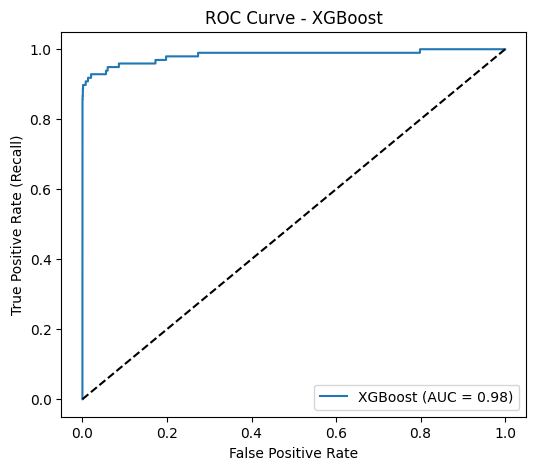

In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


## 📈 ROC Curve Analysis  
The ROC curve illustrates the tradeoff between the true positive rate (recall)  
and the false positive rate for different classification thresholds.
Plotting the ROC curve helps visually compare model performance and understand  
how well each classifier distinguishes between fraudulent and normal transactions.


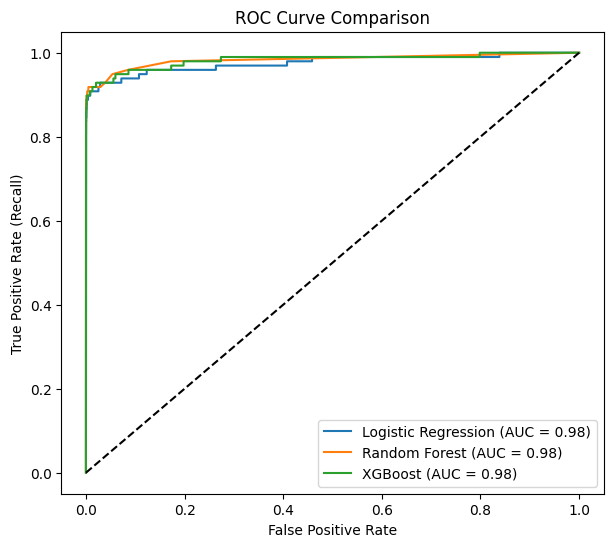

In [ ]:
plt.figure(figsize=(7,6))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## ⭐ Feature Importance  
Understanding feature importance helps identify which variables contribute the most  
to the model’s decisions. This provides insight into which features are most relevant  
for detecting fraudulent transactions. The plots below show the importance rankings  
for both Random Forest and XGBoost models.


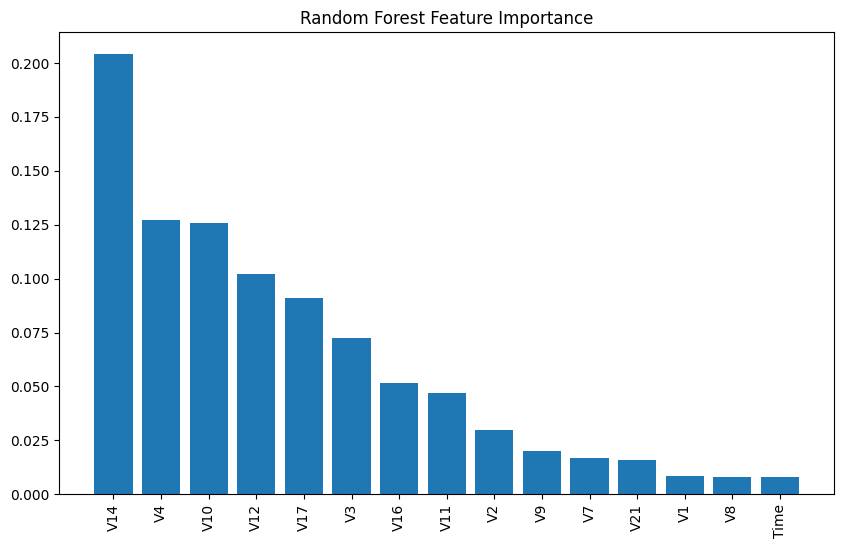

In [ ]:
# Get feature importance from Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X_train.columns

# Sort the features by importance
indices = np.argsort(rf_importances)[::-1]

# Plot top 15 features only (to keep it clean)
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(15), rf_importances[indices][:15])
plt.xticks(range(15), rf_features[indices][:15], rotation=90)
plt.show()


<Figure size 1000x600 with 0 Axes>

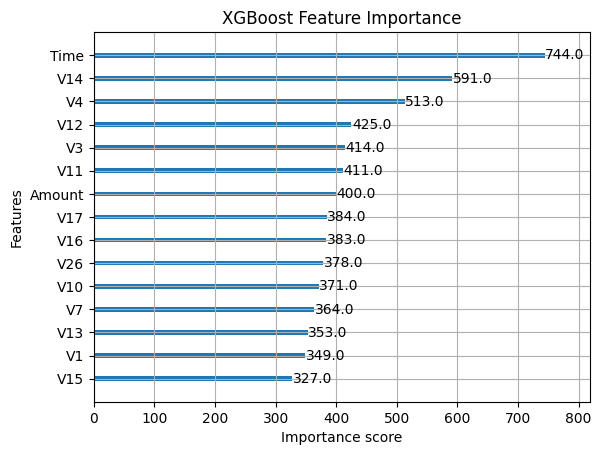

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=15)
plt.title("XGBoost Feature Importance")
plt.show()


## 📊 Model Comparison

| Model                   | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) |
|-------------------------|-------------------|-----------------|------------------|
| Logistic Regression     | 0.12              | 0.90            | 0.21             |
| Random Forest           | 0.82              | 0.82            | 0.82             |
| XGBoost                 | 0.76              | 0.86            | 0.81             |


## Decision Threshold Analysis


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class (fraud)
y_probs = rf_model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.5, 0.7]
results = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)

    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    results.append([t, precision, recall, f1])

import pandas as pd

threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1-score"])
threshold_df


,Threshold,Precision,Recall,F1-score
0,0.3,0.688000,0.877551,0.771300
1,0.5,0.824742,0.816327,0.820513
2,0.7,0.929412,0.806122,0.863388


### Interpretation

To move beyond the default classification threshold of 0.5, the model was evaluated at multiple decision thresholds.  
Lowering the threshold increases Recall, allowing the model to detect more fraudulent transactions, but at the cost of more false positives.  
Raising the threshold increases Precision, reducing false alarms, but may cause more fraudulent transactions to be missed.

At a threshold of 0.3, the model achieves the highest Recall (0.878), making it more suitable for scenarios where missing fraud (False Negatives) is more costly than incorrectly flagging legitimate transactions (False Positives).


### Selected Operating Point

Based on the business objective of minimizing undetected fraud, a decision threshold of 0.3 was selected as the operating point for this system.  
This threshold prioritizes Recall to capture as many fraudulent transactions as possible, while maintaining an acceptable level of Precision.


## Conclusion

This project addressed the problem of credit card fraud detection using supervised machine learning models on a highly imbalanced dataset.  
Multiple models were evaluated using appropriate metrics beyond accuracy, with a focus on Precision, Recall, and F1-score.

By analyzing different decision thresholds, the model was transformed from a static classifier into a decision-support tool.  
A threshold of 0.3 was selected as the operating point, prioritizing Recall to minimize undetected fraudulent transactions, in line with the business objective of reducing financial loss.

This approach demonstrates how machine learning models can be aligned with real-world business priorities, balancing fraud prevention with customer experience.  
In a production setting, the selected model and threshold could be continuously monitored and adjusted based on evolving fraud patterns and organizational risk tolerance.


## 🔮 Future Work

Several improvements can be explored to further enhance the performance of fraud detection models:

- **Hyperparameter Tuning:**  
  Applying grid search or randomized search to optimize model parameters for  
  Random Forest and XGBoost, which may improve precision and recall.

- **Feature Engineering:**  
  Creating new features from existing ones, such as transaction frequency per  
  customer or rolling statistical features, could help the models detect more  
  subtle fraud patterns.

- **Using Other Algorithms:**  
  Trying advanced algorithms like LightGBM or CatBoost, which often perform  
  exceptionally well on tabular and imbalanced datasets.

- **Anomaly Detection Techniques:**  
  Incorporating unsupervised methods such as Isolation Forest or Autoencoders  
  to detect unusual patterns even when labeled data is limited.

- **Cost-Sensitive Learning:**  
  Assigning higher misclassification costs to fraud cases to further  
  reduce false negatives and ensure fewer frauds are missed.

- **Model Deployment:**  
  Building a real-time fraud detection pipeline using APIs, streaming tools,  
  or monitoring dashboards for practical usage in production environments.
